In [1]:
#Import Libs. Dados relativos ao período de 01.01.2014 - 31.12.2019

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
#Criação de uma lista co todos arquivos CSVs, uma vez que haviam vários datasets a serem compilados.

erasmus_list = ['Finalised_mobilities_2014-2019.csv','Finalised_mobilities_2014.csv', 'Finalised_mobilities_2015.csv', 'Finalised_mobilities_2016.csv', 'Finalised_mobilities_2017.csv', 'Finalised_mobilities_2018.csv', 'Finalised_mobilities_2019.csv']
erasmus_list

['Finalised_mobilities_2014-2019.csv',
 'Finalised_mobilities_2014.csv',
 'Finalised_mobilities_2015.csv',
 'Finalised_mobilities_2016.csv',
 'Finalised_mobilities_2017.csv',
 'Finalised_mobilities_2018.csv',
 'Finalised_mobilities_2019.csv']

In [3]:
# Criação de uma DataFrame com base nas listas compiladas. 

df = pd.DataFrame()

for erasmus in erasmus_list:
    x = pd.read_csv(erasmus, sep=';', low_memory=False)
    df = df.append(x)

In [4]:
# Visualização dos do DataFrame.

pd.options.display.max_columns = 21
df.head(2)

,Project Reference,Academic Year,Mobility Start Month,Mobility End Month,Mobility Duration,Activity (mob),Field of Education,Participant Nationality,Education Level,Participant Gender,...,Participant Age,Sending Country Code,Sending City,Sending Organization,Sending Organisation Erasmus Code,Receiving Country Code,Receiving City,Receiving Organization,Receiving Organisation Erasmus Code,Participants
0,2014-1-AT02-KA347-000139,2014-2015,2014-11,2014-11,1.0,National youth meetings,? Unknown ?,AT,??? - ? Unknown ?,Female,...,13,AT,Dornbirn,bOJA - Bundesweites Netzwerk Offene Jugendarbeit,-,AT,Dornbirn,bOJA - Bundesweites Netzwerk Offene Jugendarbeit,-,2
1,2014-1-AT02-KA347-000139,2014-2015,2014-11,2014-11,1.0,National youth meetings,? Unknown ?,AT,??? - ? Unknown ?,Female,...,14,AT,Dornbirn,bOJA - Bundesweites Netzwerk Offene Jugendarbeit,-,AT,Dornbirn,bOJA - Bundesweites Netzwerk Offene Jugendarbeit,-,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3626893 entries, 0 to 736433
Data columns (total 24 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Project Reference                    object 
 1   Academic Year                        object 
 2   Mobility Start Month                 object 
 3   Mobility End Month                   object 
 4   Mobility Duration                    float64
 5   Activity (mob)                       object 
 6   Field of Education                   object 
 7   Participant Nationality              object 
 8   Education Level                      object 
 9   Participant Gender                   object 
 10  Participant Profile                  object 
 11  Special Needs                        object 
 12  Fewer Opportunities                  object 
 13  GroupLeader                          object 
 14  Participant Age                      object 
 15  Sending Country Code             

In [6]:
# Trouxe as colunas para verificar quais são aquelas que em interessam para fins de responder minhas questões.
df.columns

Index(['Project Reference', 'Academic Year', 'Mobility Start Month',
       'Mobility End Month', 'Mobility Duration', 'Activity (mob)',
       'Field of Education', 'Participant Nationality', 'Education Level',
       'Participant Gender', 'Participant Profile', 'Special Needs',
       'Fewer Opportunities', 'GroupLeader', 'Participant Age',
       'Sending Country Code', 'Sending City', 'Sending Organization',
       'Sending Organisation Erasmus Code', 'Receiving Country Code',
       'Receiving City', 'Receiving Organization',
       'Receiving Organisation Erasmus Code', 'Participants'],
      dtype='object')

In [7]:
# ano com número pouco significativo, drop.
df = df.drop(df.loc[(df['Academic Year'] =='2013-14')].index)

In [8]:
df.Participants.sum()

4201707

In [9]:
#aplicação função lambda para alterar e padronizar os anos académicos. 

df['Academic Year'] = df['Academic Year'].map(lambda x : "2014-2015" if re.match(r"2014", x.lower()) else x)

In [10]:
df['Academic Year'] = df['Academic Year'].map(lambda x : "2015-2016" if re.match(r"2015", x.lower()) else x)

In [11]:
df['Academic Year'] = df['Academic Year'].map(lambda x : "2016-2017" if re.match(r"2016", x.lower()) else x)

In [12]:
df['Academic Year'] = df['Academic Year'].map(lambda x : "2017-2018" if re.match(r"2017", x.lower()) else x)

In [13]:
df['Academic Year'] = df['Academic Year'].map(lambda x : "2018-2019" if re.match(r"2018-19", x.lower()) else x)

In [14]:
df.groupby('Academic Year').Participants.sum()

Academic Year
2014-2015    267188
2015-2016    676219
2016-2017    738640
2017-2018    784199
2018-2019    841335
2019-2020    894126
Name: Participants, dtype: int64

In [15]:
df['Academic Year'].value_counts(normalize=True)

2019-2020    0.212146
2018-2019    0.199613
2017-2018    0.186553
2016-2017    0.175434
2015-2016    0.159977
2014-2015    0.066277
Name: Academic Year, dtype: float64

In [16]:
df.to_csv('Erasmus_2014-2019.csv')

##### Pergunta 1: Número total de participantes no Erasmus+ Programme entre 2014 e 2018? ######
   <p> Foram ao todo <b>4.201.707 participantes </b> entre todos os projetos pertecentes ao Erasmus+ Programme.

<AxesSubplot:xlabel='Academic Year'>

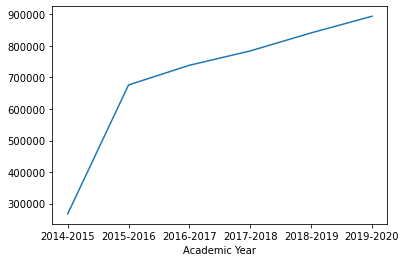

In [17]:
df.groupby('Academic Year').Participants.sum().plot()

<AxesSubplot:xlabel='Academic Year'>

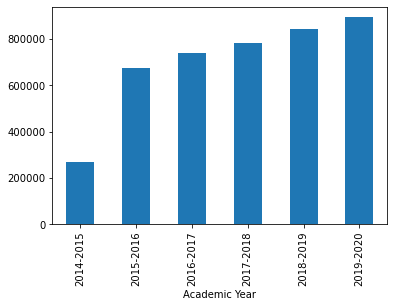

In [18]:
df.groupby('Academic Year').Participants.sum().plot(kind='bar')

### Número de participantes por gênero / ano acadêmico.

In [19]:
df.groupby(['Academic Year', 'Participant Gender']).Participants.sum().unstack()

Participant Gender,Female,Male,Undefined
Academic Year,,,
2014-2015,157709,109402,77
2015-2016,394866,280928,425
2016-2017,427268,310488,884
2017-2018,453410,330023,766
2018-2019,490134,349728,1473
2019-2020,522296,370198,1632


In [20]:
df['Participant Gender'].value_counts(normalize=True)

Female       0.582710
Male         0.416124
Undefined    0.001166
Name: Participant Gender, dtype: float64

<AxesSubplot:xlabel='Academic Year'>

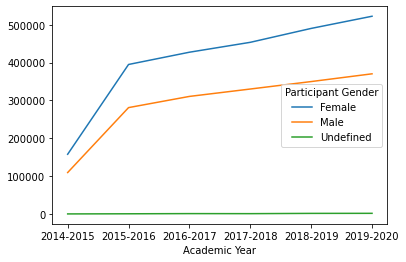

In [21]:
df.groupby(['Academic Year', 'Participant Gender']).Participants.sum().unstack().plot()

<AxesSubplot:xlabel='Academic Year'>

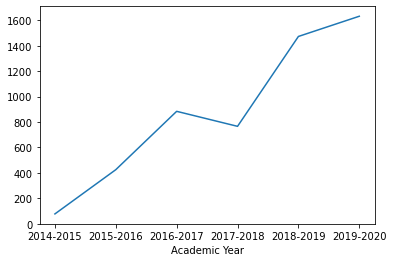

In [22]:
df.groupby(['Academic Year', 'Participant Gender']).Participants.sum().unstack().Undefined.plot()

### Número de participantes com necessidades especiais / ano acadêmico.

In [23]:
df_Special_Needs = df.groupby(['Academic Year', 'Special Needs'])['Participants'].count().unstack()
df_Special_Needs

Special Needs,No,Yes
Academic Year,,
2014-2015,238897,1483
2015-2016,575785,4434
2016-2017,631729,4550
2017-2018,672308,4299
2018-2019,718522,5454
2019-2020,764057,5375


In [24]:
df_Special_Needs['Percentual'] = df_Special_Needs.Yes/(df_Special_Needs.No+df_Special_Needs.Yes)
df_Special_Needs

Special Needs,No,Yes,Percentual
Academic Year,,,
2014-2015,238897,1483,0.006169
2015-2016,575785,4434,0.007642
2016-2017,631729,4550,0.007151
2017-2018,672308,4299,0.006354
2018-2019,718522,5454,0.007533
2019-2020,764057,5375,0.006986


In [25]:
df_Special_Needs.to_csv('df_Special_Needs.csv')

<AxesSubplot:xlabel='Academic Year'>

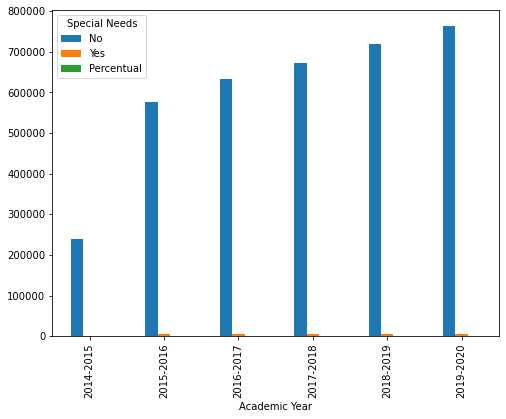

In [26]:
df_Special_Needs.plot(kind='bar', figsize=(8,6))

<AxesSubplot:xlabel='Academic Year'>

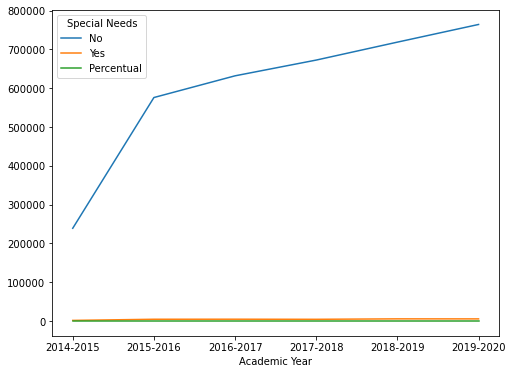

In [27]:
df_Special_Needs.plot(figsize=(8,6))

<AxesSubplot:xlabel='Academic Year'>

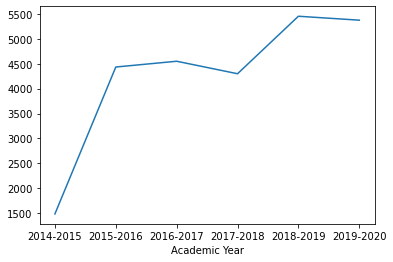

In [28]:
df_Special_Needs.Yes.plot()

In [29]:
df_name_country = df.groupby(['Receiving Country Code']).Participants.count().sort_values(ascending=False).head(15)
df_name_country

Receiving Country Code
ES    459687
DE    338113
UK    328127
IT    302015
FR    256320
PL    189910
PT    152913
NL    115081
CZ    106454
BE     99348
IE     97330
FI     89904
TR     88110
SE     84827
AT     84626
Name: Participants, dtype: int64

In [30]:
df.groupby(['Sending Country Code']).Participants.count().sort_values(ascending=False).head(15)

Sending Country Code
DE    418432
FR    394268
ES    357703
IT    330148
PL    206791
TR    183877
UK    171427
NL    129021
RO    121217
CZ    101506
PT    100121
BE     88250
HU     80817
EL     77589
AT     76471
Name: Participants, dtype: int64

In [41]:
df_receiving = df.groupby(['Academic Year', 'Receiving Country Code', 'Receiving City']).Participants.sum().sort_values(ascending=False)

In [42]:
df_receiving.to_csv('df_receiving.csv')

In [37]:
df.groupby(['Academic Year','Sending Country Code', 'Sending City']).Participants.sum().sort_values(ascending=False).head(15)

Academic Year  Sending Country Code  Sending City
2019-2020      HU                    Budapest        7704
2018-2019      DE                    Berlin          7517
2017-2018      HU                    Budapest        7458
2018-2019      HU                    Budapest        7360
2016-2017      HU                    Budapest        6751
2019-2020      DE                    Berlin          6738
2017-2018      DE                    Berlin          6558
2015-2016      HU                    Budapest        6216
2016-2017      DE                    Berlin          5559
2015-2016      DE                    Berlin          5556
2019-2020      IT                    MILANO          4784
2018-2019      FR                    Paris           4708
2019-2020      FR                    Paris           4707
2018-2019      ES                    MADRID          4685
2017-2018      ES                    MADRID          4546
Name: Participants, dtype: int64